In [39]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import pearsonr

Cargando el modelo

In [40]:
model = tf.keras.models.load_model('generadorPuntos2.h5')

In [41]:
files = [file for file in os.listdir('./parametros')]

param = pd.DataFrame()
for file in files:
  df = pd.read_csv('./parametros/'+file)
  param = pd.concat([param, df], axis= 0)

In [42]:
param

,Longitud de onda,Índice de absorción,Fracvol,Radio (nm),Espesor de la película (nm)
0,301.0,0.016685,1.0,10.0,100.0
1,302.0,0.016167,1.0,10.0,100.0
2,303.0,0.015703,1.0,10.0,100.0
3,304.0,0.015290,1.0,10.0,100.0
4,305.0,0.014916,1.0,10.0,100.0
...,...,...,...,...,...
28795,896.0,0.002255,1.0,9.0,120.0
28796,897.0,0.002257,1.0,9.0,120.0
28797,898.0,0.002258,1.0,9.0,120.0
28798,899.0,0.002260,1.0,9.0,120.0


Agarramos los primeros 600 de nuestro df porque eso es toda la gráfica

In [43]:
primeros_600 = df.head(600)
primeros_600

,Longitud de onda,Índice de absorción,Fracvol,Radio (nm),Espesor de la película (nm)
0,301.0,0.017537,1.0,10.0,120.0
1,302.0,0.017043,1.0,10.0,120.0
2,303.0,0.016599,1.0,10.0,120.0
3,304.0,0.016203,1.0,10.0,120.0
4,305.0,0.015845,1.0,10.0,120.0
...,...,...,...,...,...
595,896.0,0.002254,1.0,10.0,120.0
596,897.0,0.002256,1.0,10.0,120.0
597,898.0,0.002258,1.0,10.0,120.0
598,899.0,0.002259,1.0,10.0,120.0


Esta es la gráfica que la red intentará predecir

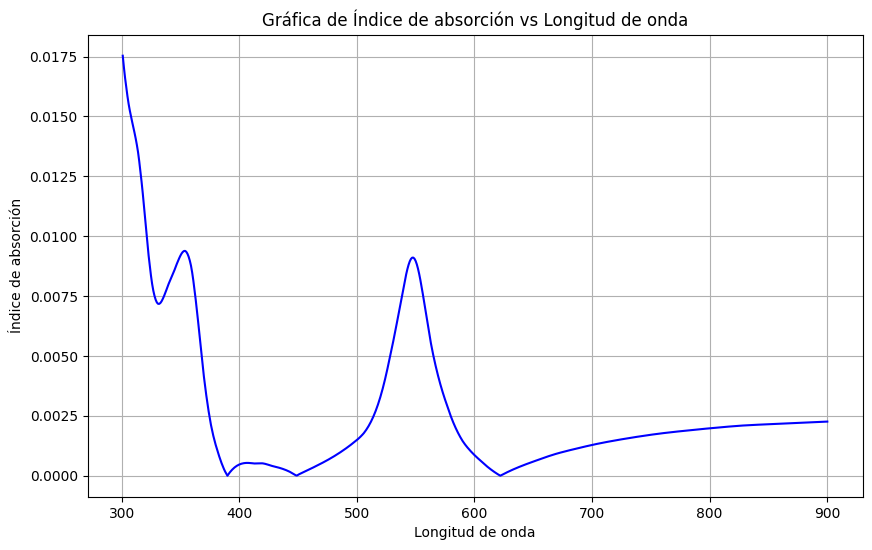

In [44]:
columnas_seleccionadas = ['Longitud de onda', 'Índice de absorción']
df_seleccionado = primeros_600[columnas_seleccionadas]

# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.plot(df_seleccionado['Longitud de onda'], df_seleccionado['Índice de absorción'], color='blue')
plt.xlabel('Longitud de onda')
plt.ylabel('Índice de absorción')
plt.title('Gráfica de Índice de absorción vs Longitud de onda')
plt.grid(True)
plt.show()

Quitamos Índice de absorción para que la red haga su trabajo

In [45]:
new_data = primeros_600.drop('Índice de absorción', axis=1)

In [46]:
new_data = new_data.values
new_data

array([[301.,   1.,  10., 120.],
       [302.,   1.,  10., 120.],
       [303.,   1.,  10., 120.],
       ...,
       [898.,   1.,  10., 120.],
       [899.,   1.,  10., 120.],
       [900.,   1.,  10., 120.]])

Normalizando los datos de entrada

In [47]:
scaler = MinMaxScaler()
new_data_normalized = scaler.fit_transform(new_data)
new_data_normalized

array([[0.        , 0.        , 0.        , 0.        ],
       [0.00166945, 0.        , 0.        , 0.        ],
       [0.0033389 , 0.        , 0.        , 0.        ],
       ...,
       [0.9966611 , 0.        , 0.        , 0.        ],
       [0.99833055, 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ]])

Prediciendo los nuevos datos

In [48]:
predictions_normalized = model.predict(new_data_normalized)

19/19 [==============================] - 0s 520us/step


creando 2 dataframes para poderlos unir y que no sean np arrays

In [49]:
df1 = pd.DataFrame(new_data, columns = ['Longitud de onda', 'Fracvol', 'Radio (nm)', 'Espesor de la película (nm)'])
df2 = pd.DataFrame(predictions_normalized , columns = ['Índice de absorción'])

juntando las predicciones con los valores anteriores

In [50]:
result_df = pd.concat([df1, df2], axis=1)
result_df

,Longitud de onda,Fracvol,Radio (nm),Espesor de la película (nm),Índice de absorción
0,301.0,1.0,10.0,120.0,0.969038
1,302.0,1.0,10.0,120.0,0.949521
2,303.0,1.0,10.0,120.0,0.930004
3,304.0,1.0,10.0,120.0,0.910487
4,305.0,1.0,10.0,120.0,0.890970
...,...,...,...,...,...
595,896.0,1.0,10.0,120.0,0.126538
596,897.0,1.0,10.0,120.0,0.126723
597,898.0,1.0,10.0,120.0,0.126909
598,899.0,1.0,10.0,120.0,0.127094


# Graficando los valores que obtuvo la red

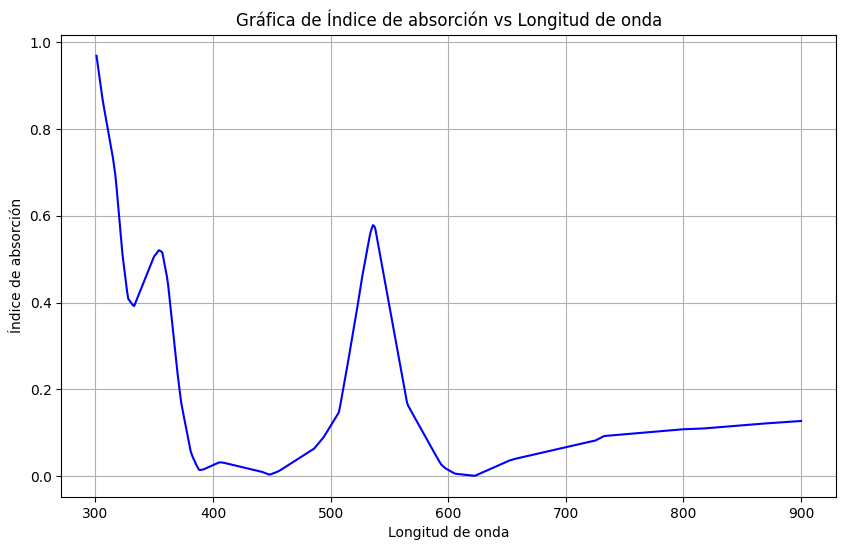

In [51]:
columnas_seleccionadas = ['Longitud de onda', 'Índice de absorción']
df_seleccionado = result_df[columnas_seleccionadas]

# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.plot(df_seleccionado['Longitud de onda'], df_seleccionado['Índice de absorción'], color='blue')
plt.xlabel('Longitud de onda')
plt.ylabel('Índice de absorción')
plt.title('Gráfica de Índice de absorción vs Longitud de onda')
plt.grid(True)
plt.show()

# Desnormalizando

In [52]:
minimo = param['Índice de absorción'].min()
maximo = param['Índice de absorción'].max()

In [53]:
res = primeros_600['Índice de absorción'] / result_df['Índice de absorción']
factor = res.mean()

result_df['Índice de absorción'] = (result_df['Índice de absorción'] * (maximo - minimo)*factor) + minimo
result_df

In [54]:
result_df['Índice de absorción'] = result_df['Índice de absorción'] * factor

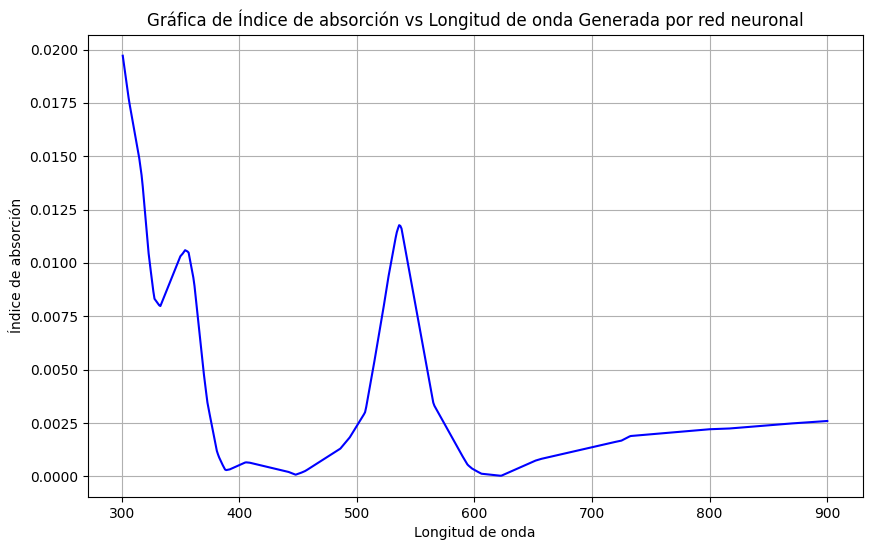

In [55]:
columnas_seleccionadas = ['Longitud de onda', 'Índice de absorción']
df_seleccionado = result_df[columnas_seleccionadas]

# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.plot(df_seleccionado['Longitud de onda'], df_seleccionado['Índice de absorción'], color='blue')
plt.xlabel('Longitud de onda')
plt.ylabel('Índice de absorción')
plt.title('Gráfica de Índice de absorción vs Longitud de onda Generada por red neuronal')
plt.grid(True)
plt.show()

Sacando el factor de escala